# Pre-processing

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from tqdm import tqdm
import itertools
import json

In [15]:
sales = pd.read_csv("../data/raw/sales.csv", header=0, delimiter=",")
sku = pd.read_csv("../data/raw/sku.csv", header=0, delimiter=",")
geoParams = pd.read_csv("../data/raw/geo_params.csv", header=0, delimiter=",")

In [ ]:
geoParams

In [ ]:
print(sales.head())
print(sales.describe())
print()
print(f"Shape of data is: {sales.shape}")
print(print(f"Shape of data with dropna() is: {sales.dropna().shape}"))
print(f"columns: {sales.columns}")
print(sales.info())
print((sales.price==0).value_counts())
print((sales.sales==0).value_counts())

In [18]:
# Confirming that all dates are represented in dataset for timeseries use
print(sales["date"].min())
print(sales["date"].max())
print(len(pd.unique(sales["date"])))

2020-01-01
2021-07-05
552


In [19]:

# sales["date"] = sales["date"].astype("datetime64")
sales.sort_values("date", inplace=True)

sales

,ID,geoCluster,SKU,date,price,sales
1105294,RR31033169,2709,49207,2020-01-01,NaN,NaN
4514843,RR55487705,2709,690818,2020-01-01,NaN,NaN
3389618,RR50579267,3095,642700,2020-01-01,NaN,NaN
1681722,RR38097281,2221,736360,2020-01-01,NaN,NaN
2366642,RR44449501,2145,20872,2020-01-01,NaN,NaN
...,...,...,...,...,...,...
3012187,RR47968039,2108,49450,2021-07-05,NaN,NaN
3011827,RR47967665,2108,47330,2021-07-05,NaN,NaN
3011381,RR47967205,2108,26194,2021-07-05,NaN,NaN
3015530,RR47986431,2112,571255,2021-07-05,NaN,NaN


In [20]:
sales = sales.join(geoParams.set_index("geoCluster"),on="geoCluster", rsuffix="gC")

salesSKU = sales[sales["SKU"]==32485]
salesSKUgeoCluster = salesSKU[salesSKU["geoCluster"]==92]
salesSKUcity = salesSKU[salesSKU["cityId"]==0]

print(salesSKU)
print(salesSKUgeoCluster)

                ID  geoCluster    SKU        date  price  sales  cityId
133138  RR28305090        2016  32485  2020-04-02  42.09   3.40       0
133139  RR28305091        2016  32485  2020-04-03    NaN    NaN       0
481806  RR29354514        2120  32485  2020-04-04  40.69  25.74       0
821446  RR30141881        2247  32485  2020-04-04  39.79  12.87       0
975960  RR30556188        2358  32485  2020-04-04  39.79  14.87       0
...            ...         ...    ...         ...    ...    ...     ...
814167  RR30124325        2245  32485  2021-07-05  39.99   7.40       0
801491  RR30095217        2242  32485  2021-07-05  41.29   4.00       0
797065  RR30087697        2241  32485  2021-07-05    NaN    NaN       0
805697  RR30102576        2243  32485  2021-07-05  41.99   1.50       0
810325  RR30116558        2244  32485  2021-07-05  41.29   1.00       0

[127987 rows x 7 columns]
           ID  geoCluster    SKU        date  price  sales  cityId
0  RR27956459          92  32485  2021-07-

Sales is our target variable that we will want to predict.

In [21]:
# salesSKU = sales[sales["SKU"]==28]
# salesSKUgeoCluster = salesSKU[salesSKU["geoCluster"]==294]
# key = f'{geoCluster}_{sku}'
# value = salesSKUgeoCluster
# salesSubsets[key] = value


In [22]:
SKUset = set(sales["SKU"])
salesSubsets = {}
# append all of the info being gathered into a list, and then convert that to a dataframe if needed.
# drop unnecessary columns being saved
for geoCluster in tqdm(enumerate(geoParams["geoCluster"]), total=len(geoParams["geoCluster"])):
    for sku in SKUset:
        salesSKU = sales[sales["SKU"]==sku]
        salesSKUgeoCluster = salesSKU[salesSKU["geoCluster"]==geoCluster[1]]
        key = f'{geoCluster[1]}_{sku}'
        salesSubsets[key] = salesSKUgeoCluster[["date", "price", "sales"]].values.tolist()
salesSubsets

100%|██████████| 515/515 [05:31<00:00,  1.55it/s]


{'21_690818': [],
 '21_20872': [],
 '21_16649': [],
 '21_642700': [],
 '21_219149': [],
 '21_571255': [],
 '21_134544': [],
 '21_815381': [],
 '21_24': [],
 '21_591899': [],
 '21_711838': [],
 '21_32546': [],
 '21_567970': [],
 '21_32549': [],
 '21_32550': [],
 '21_39465': [],
 '21_375210': [],
 '21_534443': [],
 '21_49450': [],
 '21_650670': [],
 '21_543663': [],
 '21_369071': [],
 '21_660399': [],
 '21_49207': [],
 '21_233272': [],
 '21_144184': [],
 '21_259516': [],
 '21_787133': [],
 '21_596031': [],
 '21_363713': [],
 '21_782787': [],
 '21_219078': [],
 '21_224200': [],
 '21_666058': [],
 '21_819149': [],
 '21_802382': [],
 '21_819150': [],
 '21_208': [],
 '21_638673': [],
 '21_26194': [],
 '21_521941': [],
 '21_67802': [],
 '21_503007': [],
 '21_221793': [],
 '21_47330': [],
 '21_362721': [],
 '21_32485': [],
 '21_552806': [],
 '21_736357': [],
 '21_736360': [],
 '21_32490': [],
 '21_552812': [],
 '21_612845': [],
 '21_440815': [],
 '21_1008': [],
 '21_89074': [],
 '21_437495': [

In [28]:
salesSubsets_csv = "../data/processed/sales_subsets.csv"
try:
    with open(salesSubsets_csv, 'w') as file:
        json.dump(salesSubsets, file)

except IOError:
    print("I/O error")

# Reload processed subsets

In [29]:
with open(salesSubsets_csv) as file:
    salesSubsets = json.load(file)

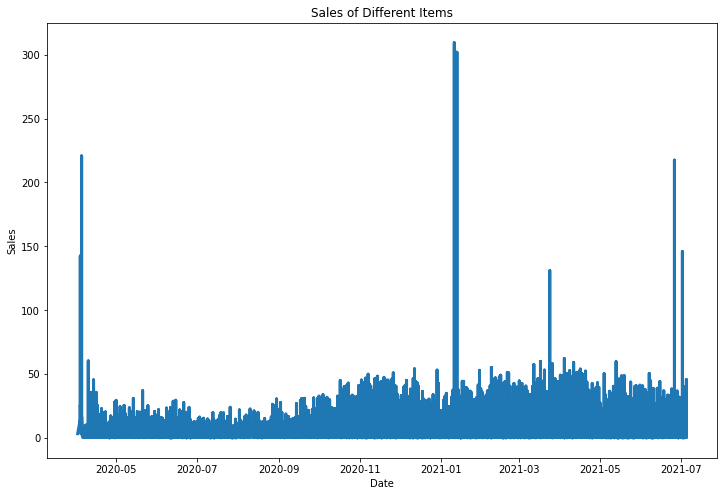

In [11]:
fig = plt.figure(figsize=(12,8))

plt.plot(sales.index[sales["SKU"]==32485], sales.loc[sales["SKU"]==32485, "sales"], label="SKU24", linewidth=3)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales of Different Items")

plt.show()

In [13]:
sales.loc[sales["SKU"]==24, "sales"]

date
2020-04-04    4.1
2020-04-06    2.4
2020-04-07    1.2
2020-04-07    5.0
2020-04-08    2.5
             ... 
2021-07-05    2.0
2021-07-05    1.5
2021-07-05    1.0
2021-07-05    0.3
2021-07-05    0.5
Name: sales, Length: 7517, dtype: float64

In [38]:
SKUset = set(sales["SKU"])
SKUset

{24,
 208,
 1008,
 16649,
 20872,
 26194,
 32485,
 32490,
 32546,
 32549,
 32550,
 39465,
 47330,
 49207,
 49450,
 67802,
 89074,
 96123,
 134544,
 144184,
 219078,
 219149,
 221793,
 224200,
 233272,
 259516,
 362721,
 363713,
 369071,
 375210,
 437495,
 440815,
 503007,
 521941,
 534443,
 543663,
 552806,
 552812,
 567970,
 571255,
 571258,
 591899,
 596031,
 612845,
 638673,
 642700,
 650670,
 660399,
 666058,
 690818,
 711838,
 736357,
 736360,
 782787,
 787133,
 802382,
 815381,
 819149,
 819150,
 838137}

In [41]:
geoCluster = 2
sku = 3
key = f'{geoCluster}{sku}'
key

'23'

,ID,geoCluster,SKU,price,sales,cityId
date,,,,,,
2020-04-02,RR28305090,2016,32485,42.09,3.40,0
2020-04-04,RR29307847,2116,32485,39.79,14.87,0
2020-04-04,RR30305994,2265,32485,39.79,38.61,0
2020-04-04,RR31060568,2734,32485,40.69,12.87,0
2020-04-04,RR28238584,2009,32485,39.79,12.87,0
...,...,...,...,...,...,...
2021-07-05,RR29936611,2226,32485,41.29,3.90,0
2021-07-05,RR29953694,2229,32485,41.29,8.10,0
2021-07-05,RR29898584,2220,32485,41.99,10.70,0


,ID,geoCluster,SKU,price,sales,cityId
date,,,,,,
2021-07-05,RR27956459,92,32485,38.29,4.0,1


,ID,geoCluster,SKU,price,sales,cityId
date,,,,,,
2020-04-02,RR28305090,2016,32485,42.09,3.40,0
2020-04-04,RR29307847,2116,32485,39.79,14.87,0
2020-04-04,RR30305994,2265,32485,39.79,38.61,0
2020-04-04,RR31060568,2734,32485,40.69,12.87,0
2020-04-04,RR28238584,2009,32485,39.79,12.87,0
...,...,...,...,...,...,...
2021-07-05,RR29936611,2226,32485,41.29,3.90,0
2021-07-05,RR29953694,2229,32485,41.29,8.10,0
2021-07-05,RR29898584,2220,32485,41.99,10.70,0
